In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [4]:
%matplotlib inline
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

In [5]:
df = pd.read_excel('../data/Prices.xlsx', sheet_name='Daily', skiprows=8, usecols='D:E', index_col='Name')

In [13]:
prophet_model = Prophet(seasonality_mode='multiplicative', daily_seasonality=True)

In [8]:
# renaming for fbprophet
df.rename_axis('ds', inplace=True)
df.rename(columns={'US dollar':'y'}, inplace=True)
df.reset_index(inplace=True) 

df.head()

,ds,y
0,1978-12-29,226.00
1,1979-01-01,226.00
2,1979-01-02,226.80
3,1979-01-03,218.60
4,1979-01-04,223.15


In [14]:
prophet_model.fit(df)

Initial log joint probability = -327.907


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       24902.2     0.0293029       2139.82      0.2994           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       26554.4      0.018489       3686.31           1           1      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       27375.6     0.0296734       7902.09           1           1      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       28462.8     0.0315887       12811.9           1           1      522   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         29031     0.0233544         15444           1           1      640   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [15]:
future_dataset= prophet_model.make_future_dataframe(periods=15, freq='y') # 15 YEARS OF DATA

1749       849.433           1           1     5455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4599       30515.9   0.000150001       889.338           1           1     5572   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4699       30517.9   0.000450341       617.972      0.8026     0.08026     5698   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4799       30520.9    0.00318606       2754.24           1           1     5816   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4899       30525.8    0.00484972       2102.22      0.3769           1     5937   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    4999       30528.3    0.00109919       581.734           1           1     6057   
    Iter      log prob        ||dx||      ||grad||

In [16]:
pred = prophet_model.predict(future_dataset)
pred[['ds','yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1978-12-29,138.999446,35.382347,246.193130
1,1979-01-01,142.373071,38.825111,243.994819
2,1979-01-02,143.555412,30.265031,249.019182
3,1979-01-03,144.722861,35.404621,244.240674
4,1979-01-04,145.887080,36.103953,244.053666


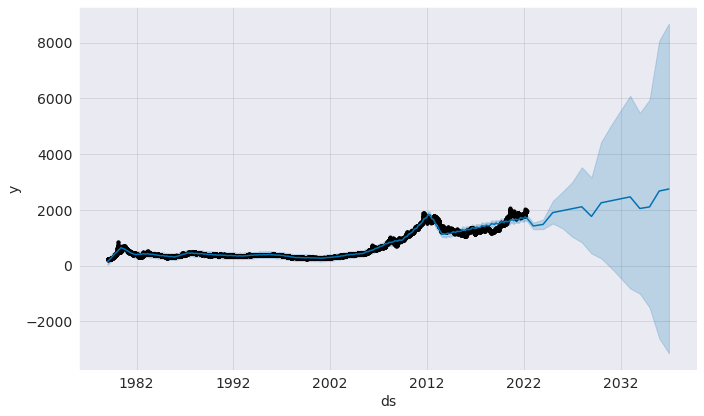

In [17]:
prophet_model.plot(pred);